In [36]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from keras.utils import to_categorical, plot_model
from keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import mnist

In [26]:
(x_train, y_train), (x_val, y_val)= mnist.load_data()

y_train= to_categorical(y_train)
y_val= to_categorical(y_val)

#reshape and normalize x_train and x_test
x_train = np.reshape(x_train.astype('float32'),[-1, 28,28,1])/255.
x_val = np.reshape(x_val.astype('float32'),[-1, 28,28,1])/255.

In [27]:
#load  train data
df= pd.read_csv("train.csv")

#create y_train i.e. labels
#y_train= np.array(df['label'])

#create x_train i.e the pixel values
#x_train= np.array(df.drop(labels=['label'], axis=1))

#load test data
df2= pd.read_csv("test.csv")
x_test= np.array(df2)

In [3]:
#check the shapes
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(42000, 784)
(42000,)
(28000, 784)


In [4]:
#check the unique labels
print(np.unique(y_train))
print(len(np.unique(y_train)))

[0 1 2 3 4 5 6 7 8 9]
10


In [5]:
#One hot encoding

y_train= to_categorical(y_train)

In [28]:
#reshape and normalize x_train and x_test
#x_train = np.reshape(x_train.astype('float32'),[-1, 28,28,1])/255.
x_test = np.reshape(x_test.astype('float32'),[-1, 28,28,1])/255.

In [46]:
#model

model= Sequential()
model.add(Conv2D(32, 3, input_shape=(28,28,1), activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(64, 3, input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D(2))
model.add(Dropout(0.2))
model.add(Conv2D(128, 3, input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D(2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
dropout_19 (Dropout)         (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 128)         0         
__________

In [47]:
#Compile
optimizer= Adam(lr=0.0002, decay= 0.00001)
model.compile( optimizer= 'adam', loss= 'categorical_crossentropy', metrics=['acc'])

In [48]:
#Training
history= model.fit(x_train, y_train, epochs=30, batch_size=512, validation_data=(x_val, y_val))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 8s 131us/step - loss: 0.3589 - acc: 0.8873 - val_loss: 0.0550 - val_acc: 0.9823
Epoch 2/30
60000/60000 [==============================] - 7s 122us/step - loss: 0.0699 - acc: 0.9783 - val_loss: 0.0385 - val_acc: 0.9872
Epoch 3/30
60000/60000 [==============================] - 7s 123us/step - loss: 0.0479 - acc: 0.9856 - val_loss: 0.0273 - val_acc: 0.9903
Epoch 4/30
60000/60000 [==============================] - 7s 123us/step - loss: 0.0377 - acc: 0.9883 - val_loss: 0.0257 - val_acc: 0.9916
Epoch 5/30
60000/60000 [==============================] - 7s 123us/step - loss: 0.0311 - acc: 0.9901 - val_loss: 0.0227 - val_acc: 0.9924
Epoch 6/30
60000/60000 [==============================] - 7s 123us/step - loss: 0.0260 - acc: 0.9915 - val_loss: 0.0228 - val_acc: 0.9932
Epoch 7/30
60000/60000 [==============================] - 7s 125us/step - loss: 0.0236 - acc: 0.9923 - val_loss: 0.0242 - 

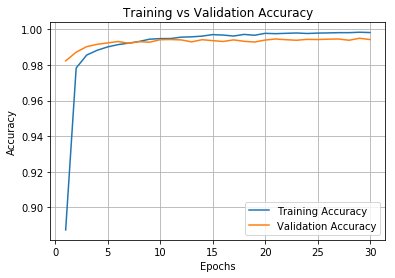

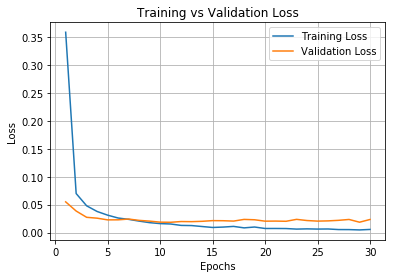

In [49]:
acc= history.history['acc']
val_acc= history.history['val_acc']

loss= history.history['loss']
val_loss= history.history['val_loss']

epochs= range(1, len(acc)+1)

plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.grid()
plt.legend()
plt.show()

plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.grid()
plt.legend()
plt.show()

In [50]:
op= model.predict(x_test)

In [51]:
# select the indix with the maximum probability
results = np.argmax(op,axis = 1)

results = pd.Series(results,name="Label")

In [52]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("mnist_test_result_4.csv",index=False)